# Wrangle and Analyze Data Project

## Impoting Data

In [1]:
import pandas as pd
import requests
import numpy as np
import json
import tweepy
import io
import time
import matplotlib.pyplot as plt

In [2]:
df_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').content
df_image = pd.read_csv(io.StringIO(url.decode('utf-8')),sep='\t')
df_image.to_csv('image_predictions.csv')

In [4]:
consumer_key = 'tTDxvnAYNKWMWcitrVpHxNZCL'
consumer_secret = 'By3U1xFfa4ZFZd1kKEsGjsTTRYmJ5s6wypjLqVI83cmj54VP52'
access_token = '2213870713-q0Mpgyn3cFeexF5SV0vWGi0YeHnJYNRSrOkDmWy'
access_secret = 'k04cSza4hxg45YMd76MJx3qeT4v5Ce6MF4AcGg7sVGUeZ'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [5]:
tweets=[]

In [6]:
for i in df_image.tweet_id:
    try:
        tweets.append(api.get_status(i, tweet_mode='extended'))
        time.sleep(.1)
    except:
      print("Error for: " + str(i))

Error for: 680055455951884288


Rate limit reached. Sleeping for: 501


Error for: 754011816964026368
Error for: 802247111496568832


Rate limit reached. Sleeping for: 513


Error for: 837012587749474308
Error for: 842892208864923648
Error for: 861769973181624320
Error for: 873697596434513921
Error for: 888202515573088257


In [7]:
json_list = []
for i in tweets:
    json_list.append(i._json)

In [8]:
with open('df_json.txt', 'w') as outfile:  
      json.dump(json_list, outfile)

In [9]:
df_json = pd.read_json('df_json.txt')

## Assess

### df_image assessment

In [10]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
df_image.duplicated().sum()

0

In [14]:
df_image.tweet_id.duplicated().sum()

0

In [15]:
df_image.jpg_url.duplicated().sum()

66

In [16]:
df_image[df_image.jpg_url.duplicated()].head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False


In [17]:
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2023,881536004380872706,https://pbs.twimg.com/ext_tw_video_thumb/88153...,1,Samoyed,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False
867,697575480820686848,https://pbs.twimg.com/media/Ca5JMvMUsAAGMll.jpg,1,Siamese_cat,0.256698,False,whippet,0.119805,True,bull_mastiff,0.102595,True
606,679877062409191424,https://pbs.twimg.com/media/CW9olDsUsAA0XSf.jpg,1,hog,0.809466,False,hay,0.060178,False,lumbermill,0.016483,False
816,692828166163931137,https://pbs.twimg.com/media/CZ1riVOWwAATfGf.jpg,1,Samoyed,0.985857,True,Arctic_fox,0.007852,False,white_wolf,0.003278,False
899,699788877217865730,https://pbs.twimg.com/media/CbYmRHyWEAASNzm.jpg,1,Border_terrier,0.355060,True,toy_poodle,0.169736,True,Norwegian_elkhound,0.099884,True


In [18]:
df_image[(df_image.p1_dog == False) & (df_image.p2_dog == False) &(df_image.p3_dog == False)].sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1940,860924035999428608,https://pbs.twimg.com/media/C_KVJjDXsAEUCWn.jpg,2,envelope,0.933016,False,oscilloscope,0.012591,False,paper_towel,0.011178,False
1210,742465774154047488,https://pbs.twimg.com/media/Ck3EribXEAAPhZn.jpg,1,web_site,0.997154,False,comic_book,0.000439,False,desktop_computer,0.000268,False
288,671159727754231808,https://pbs.twimg.com/media/CVBwNjVWwAAlUFQ.jpg,1,pitcher,0.117446,False,sunglasses,0.062487,False,mask,0.059517,False
1975,870063196459192321,https://pbs.twimg.com/media/DBMV3NnXUAAm0Pp.jpg,1,comic_book,0.534409,False,envelope,0.280722,False,book_jacket,0.043786,False
1665,812503143955202048,https://pbs.twimg.com/media/C0aXTLqXEAADxBi.jpg,2,loupe,0.546856,False,web_site,0.345298,False,bubble,0.010528,False


### df_arch assessment

In [19]:
df_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [20]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [21]:
df_arch.text.sample(5)

609     This is Cassie. She steals things. Guilt incre...
2109    Vibrant dog here. Fabulous tail. Only 2 legs t...
738     This is Koda. He has a weird relationship with...
1730    This is Bruce. He's a rare pup. Covered in Fro...
1477    When you keepin the popcorn bucket in your lap...
Name: text, dtype: object

In [22]:
df_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [23]:
df_arch.rating_numerator[df_arch.rating_numerator > 14]

55        17
188      420
189      666
285       15
290      182
291       15
313      960
340       75
433       84
516       24
695       75
763       27
902      165
979     1776
1120     204
1202      50
1228      99
1254      80
1274      45
1351      60
1433      44
1634     143
1635     121
1663      20
1712      26
1779     144
1843      88
2074     420
Name: rating_numerator, dtype: int64

In [24]:
df_arch.rating_denominator[df_arch.rating_denominator > 10]

342      15
433      70
784      11
902     150
1068     11
1120    170
1165     20
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1598     20
1634    130
1635    110
1662     11
1663     16
1779    120
1843     80
Name: rating_denominator, dtype: int64

In [25]:
df_arch.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [26]:
df_arch.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [27]:
df_arch.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [28]:
df_arch.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### df_json assessment

In [29]:
df_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,lang,place,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2015-11-15 22:32:08,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",2534,False,Here we have a Japanese Irish Setter. Lost eye...,NaN,...,en,None,False,False,504,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2015-11-15 23:05:30,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...",128,False,This is a western brown Mitsubishi terrier. Up...,NaN,...,en,None,False,False,47,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2015-11-15 23:21:54,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...",124,False,Here is a very happy pup. Big fan of well-main...,NaN,...,en,None,False,False,43,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2015-11-16 00:04:52,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...",294,False,This is a purebred Piers Morgan. Loves to Netf...,NaN,...,en,None,False,False,139,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2015-11-16 00:24:50,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...",107,False,Here we have a 1949 1st generation vulpix. Enj...,NaN,...,en,None,False,False,41,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [30]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 28 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2067 non-null datetime64[ns]
display_text_range               2067 non-null object
entities                         2067 non-null object
extended_entities                2067 non-null object
favorite_count                   2067 non-null int64
favorited                        2067 non-null bool
full_text                        2067 non-null object
geo                              0 non-null float64
id                               2067 non-null int64
id_str                           2067 non-null int64
in_reply_to_screen_name          23 non-null object
in_reply_to_status_id            23 non-null float64
in_reply_to_status_id_str        23 non-null float64
in_reply_to_user_id              23 non-null float64
in_reply_to_user_id_str          23 n

In [31]:
df_json.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,retweet_count
count,0.0,0.0,2067.000000,0.0,2.067000e+03,2.067000e+03,2.300000e+01,2.300000e+01,2.300000e+01,2.300000e+01,2067.000000
mean,NaN,NaN,8429.101597,NaN,7.381455e+17,7.381455e+17,6.978112e+17,6.978112e+17,4.196984e+09,4.196984e+09,2808.412192
std,NaN,NaN,12694.746340,NaN,6.768193e+16,6.768193e+16,4.359384e+16,4.359384e+16,0.000000e+00,0.000000e+00,4886.113158
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.671522e+17,6.671522e+17,4.196984e+09,4.196984e+09,12.000000
25%,NaN,NaN,1602.500000,NaN,6.764355e+17,6.764355e+17,6.732411e+17,6.732411e+17,4.196984e+09,4.196984e+09,598.000000
50%,NaN,NaN,3709.000000,NaN,7.117327e+17,7.117327e+17,6.757073e+17,6.757073e+17,4.196984e+09,4.196984e+09,1323.000000
75%,NaN,NaN,10542.000000,NaN,7.931430e+17,7.931430e+17,7.031489e+17,7.031489e+17,4.196984e+09,4.196984e+09,3240.000000
max,NaN,NaN,164571.000000,NaN,8.924206e+17,8.924206e+17,8.558181e+17,8.558181e+17,4.196984e+09,4.196984e+09,83830.000000


In [32]:
df_json.id[40]

666691418707132416

In [33]:
df_json.id_str[40]

666691418707132416

In [34]:
df_json.favorited.value_counts()

False    2067
Name: favorited, dtype: int64

In [35]:
df_json.favorite_count.describe()

count      2067.000000
mean       8429.101597
std       12694.746340
min           0.000000
25%        1602.500000
50%        3709.000000
75%       10542.000000
max      164571.000000
Name: favorite_count, dtype: float64

In [36]:
df_json.place.sample(20)

494     None
1864    None
1285    None
1625    None
1408    None
1736    None
908     None
1426    None
1861    None
1137    None
1719    None
1316    None
1940    None
1497    None
1639    None
1850    None
1212    None
1572    None
1540    None
1994    None
Name: place, dtype: object

In [37]:
df_json.possibly_sensitive_appealable.sum()

0

In [38]:
df_json.retweeted.sum()

0

In [39]:
df_json.is_quote_status.sum()

0

In [40]:
df_json.lang.value_counts()

en    2059
nl       3
in       2
ro       1
et       1
eu       1
Name: lang, dtype: int64

In [41]:
df_json.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [42]:
df_json.truncated.sum()

0

In [43]:
df_json.user[0]

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs™',
 'screen_name': 'dog_rates',
 'location': 'merch  ⇨',
 'description': 'Your Only Source For Professional Dog Ratings ⠀ ⠀IG, FB, Snapchat ⇨ WeRateDogs ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ Business: dogratingtwitter@gmail.com',
 'url': 'https://t.co/N7sNNHAEXS',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 7546477,
 'friends_count': 12,
 'listed_count': 5640,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 140661,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 9465,
 'lang': 'en',
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'http://abs.twimg.com/image

In [44]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 28 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2067 non-null datetime64[ns]
display_text_range               2067 non-null object
entities                         2067 non-null object
extended_entities                2067 non-null object
favorite_count                   2067 non-null int64
favorited                        2067 non-null bool
full_text                        2067 non-null object
geo                              0 non-null float64
id                               2067 non-null int64
id_str                           2067 non-null int64
in_reply_to_screen_name          23 non-null object
in_reply_to_status_id            23 non-null float64
in_reply_to_status_id_str        23 non-null float64
in_reply_to_user_id              23 non-null float64
in_reply_to_user_id_str          23 n

In [45]:
df_json.entities[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 666020881337073664,
   'id_str': '666020881337073664',
   'indices': [108, 131],
   'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
   'url': 'https://t.co/BLDqew2Ijj',
   'display_url': 'pic.twitter.com/BLDqew2Ijj',
   'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1',
   'type': 'photo',
   'sizes': {'medium': {'w': 960, 'h': 720, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'large': {'w': 960, 'h': 720, 'resize': 'fit'},
    'small': {'w': 680, 'h': 510, 'resize': 'fit'}}}]}

In [46]:
df_json.extended_entities[0]

{'media': [{'id': 666020881337073664,
   'id_str': '666020881337073664',
   'indices': [108, 131],
   'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
   'url': 'https://t.co/BLDqew2Ijj',
   'display_url': 'pic.twitter.com/BLDqew2Ijj',
   'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1',
   'type': 'photo',
   'sizes': {'medium': {'w': 960, 'h': 720, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'large': {'w': 960, 'h': 720, 'resize': 'fit'},
    'small': {'w': 680, 'h': 510, 'resize': 'fit'}}}]}

In [47]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 28 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2067 non-null datetime64[ns]
display_text_range               2067 non-null object
entities                         2067 non-null object
extended_entities                2067 non-null object
favorite_count                   2067 non-null int64
favorited                        2067 non-null bool
full_text                        2067 non-null object
geo                              0 non-null float64
id                               2067 non-null int64
id_str                           2067 non-null int64
in_reply_to_screen_name          23 non-null object
in_reply_to_status_id            23 non-null float64
in_reply_to_status_id_str        23 non-null float64
in_reply_to_user_id              23 non-null float64
in_reply_to_user_id_str          23 n

### Tidiness issues

1. "df_image": There are 3 separate columns for whether or not each row is a dog.

2. "df_arch": The columns [doggo, floofer, pupper, puppo] can be combined in 1 column.

3. "df_json": Columns id and id_str have the same value.

4. All 3 datasets can be combined into 1.

### Quality issues

1. "df_image": Some rows are not dogs.

2. "df_arch": Columns rating_numinator and rating_denominator often have values more than 10. (Won't be fixed based on instructions)

3. "df_arch": 5 columns ralated to replay_ and retweeted_ have less than 100 non null values. We don't want retweets.

4. "df_arch": Values in column source are html tags.

5. "df_json": All values in favorited, possibly_sensitive_appealable, retweeted, truncated and is_quote_status are False.

6. "df_json": Columns contributors, coordinates and geo don't have any value.

7. "df_json": Columns in_reply... ,place and retweeted_status have very few valid values.

8. "df_json": Columns display_text_range, entities, extended_entities seems useless.

9. "df_json": Each value in column user is a dictionary.

# Cleaning

In [48]:
clean_image = df_image.copy()
clean_arch = df_arch.copy()
clean_json = df_json.copy()

## Deleting unnecessary rows

Some rows are not dogs, we'll check if all predictions are False on whether or not the picture is a dog.

In [49]:
clean_image = clean_image.drop(clean_image.query('p1_dog== False & p2_dog==False & p3_dog==False').index,axis=0)

In [50]:
clean_image.query('p1_dog== False & p2_dog==False & p3_dog==False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


There are roghly 300 more rows in the df_arch dataset, since we are looking only for rows with images, we'll drop the extra rows when merging the datasets.

In [51]:
len(df_arch)

2356

In [52]:
len(df_image)

2075

## Deleting unnecessary columns

Column img_num won't be of any help, so I'll drop it.

In [53]:
clean_image = clean_image.drop(['img_num'],axis=1)

In [54]:
clean_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 11 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 128.2+ KB


Also columns 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
'retweeted_status_timestamp','source','expanded_urls' won't be helping us as well.

In [55]:
clean_arch = clean_arch.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
              'retweeted_status_user_id','retweeted_status_timestamp','source','expanded_urls'],axis=1)

In [56]:
clean_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(7)
memory usage: 184.1+ KB


And columns 'contributors','coordinates','display_text_range','entities','extended_entities','favorited','geo','id_str',
'in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','is_quote_status','place','possibly_sensitive','possibly_sensitive_appealable','retweeted','retweeted_status','truncated','created_at' as well.

In [57]:
clean_json = clean_json.drop(['contributors','coordinates','display_text_range','entities','extended_entities',
                             'favorited','geo','id_str','in_reply_to_screen_name','in_reply_to_status_id',
                             'in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str',
                             'is_quote_status','place','possibly_sensitive','possibly_sensitive_appealable',
                             'retweeted','retweeted_status','truncated','created_at'],axis=1)

In [58]:
clean_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 7 columns):
favorite_count    2067 non-null int64
full_text         2067 non-null object
id                2067 non-null int64
lang              2067 non-null object
retweet_count     2067 non-null int64
source            2067 non-null object
user              2067 non-null object
dtypes: int64(3), object(4)
memory usage: 113.1+ KB


### Combining all 3 datasets

To make life easier for cleaning and analyzing the data, I'll merge all of them together using tweet id as key.

In [59]:
clean_mix = clean_image.merge(clean_arch, on='tweet_id')

In [60]:
clean_mix = clean_mix.merge(clean_json, left_on='tweet_id',right_on='id')

In [61]:
clean_mix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1744 entries, 0 to 1743
Data columns (total 27 columns):
tweet_id              1744 non-null int64
jpg_url               1744 non-null object
p1                    1744 non-null object
p1_conf               1744 non-null float64
p1_dog                1744 non-null bool
p2                    1744 non-null object
p2_conf               1744 non-null float64
p2_dog                1744 non-null bool
p3                    1744 non-null object
p3_conf               1744 non-null float64
p3_dog                1744 non-null bool
timestamp             1744 non-null object
text                  1744 non-null object
rating_numerator      1744 non-null int64
rating_denominator    1744 non-null int64
name                  1744 non-null object
doggo                 1744 non-null object
floofer               1744 non-null object
pupper                1744 non-null object
puppo                 1744 non-null object
favorite_count        1744 non-null int

Now since I don't need column "id" anymore I'll just drop it.

In [62]:
clean_mix = clean_mix.drop(['id','tweet_id'],axis=1)

### Combining dog type predictions into one column

There are 3 predictions for each dog, after visually investigating some of the rows I saw some error where probabilities are low. So I'm going to filter the dataset and exclude the lower quartile of the first prediction probability (p1_conf) and also the first quartile of the difference between p1_conf and p2_conf to exclude the rows where the two probabilities are too close to each other.

In [63]:
clean_mix.p1.value_counts()[:10]

golden_retriever      150
Labrador_retriever    100
Pembroke               88
Chihuahua              81
pug                    57
chow                   44
Samoyed                42
toy_poodle             39
Pomeranian             38
malamute               30
Name: p1, dtype: int64

In [64]:
clean_mix.p2.value_counts()[:10]

Labrador_retriever          104
golden_retriever             92
Cardigan                     73
Chihuahua                    44
Chesapeake_Bay_retriever     41
Pomeranian                   41
French_bulldog               40
toy_poodle                   37
cocker_spaniel               34
Siberian_husky               33
Name: p2, dtype: int64

In [65]:
are_we_sure = clean_mix.apply(lambda x: x.p1_conf - x.p2_conf,axis=1)

In [66]:
are_we_sure.describe()

count    1744.000000
mean        0.466484
std         0.331768
min         0.000186
25%         0.150711
50%         0.431452
75%         0.780809
max         0.999974
dtype: float64

In [67]:
clean_mix.p1_conf.describe()

count    1744.000000
mean        0.604251
std         0.265929
min         0.044333
25%         0.377248
50%         0.605331
75%         0.848809
max         0.999984
Name: p1_conf, dtype: float64

In [68]:
clean_mix[are_we_sure < 0.150744]

,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,...,doggo,floofer,pupper,puppo,favorite_count,full_text,lang,retweet_count,source,user
3,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,...,None,None,None,None,294,This is a purebred Piers Morgan. Loves to Netf...,en,139,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,...,None,None,None,None,111,Here is the Rand Paul of retrievers folks! He'...,en,57,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
11,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True,...,None,None,None,None,318,Let's hope this flight isn't Malaysian (lol). ...,en,160,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
12,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,pug,0.489814,True,bull_mastiff,0.404722,True,French_bulldog,0.048960,True,...,None,None,None,None,115,Here we have a well-established sunblockerspan...,en,44,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
13,https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg,bloodhound,0.195217,True,German_shepherd,0.078260,True,malinois,0.075628,True,...,None,None,None,None,162,This appears to be a Mongolian Presbyterian mi...,en,72,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
15,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,English_setter,0.298617,True,Newfoundland,0.149842,True,borzoi,0.133649,True,...,None,None,None,None,80,Oh my. Here you are seeing an Adobe Setter giv...,en,12,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
16,https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg,Italian_greyhound,0.176053,True,toy_terrier,0.111884,True,basenji,0.111152,True,...,None,None,None,None,172,Can take selfies 11/10 https://t.co/ws2AMaNwPW,en,76,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
18,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True,...,None,None,None,None,195,This is an extremely rare horned Parthenon. No...,en,90,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
21,https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg,soft-coated_wheaten_terrier,0.326467,True,Afghan_hound,0.259551,True,briard,0.206803,True,...,None,None,None,None,186,Those are sunglasses and a jean jacket. 11/10 ...,en,91,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
24,https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg,toy_terrier,0.149680,True,papillon,0.148258,True,Chihuahua,0.142860,True,...,None,None,None,None,124,This is Walter. He is an Alaskan Terrapin. Lov...,en,45,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [69]:
clean_mix = clean_mix[(are_we_sure > 0.150744) & (clean_mix.p1_conf > 0.377417)]

There are still a number of rows where the p1 prediction is not a dog, I'll delete those as well.

In [70]:
clean_mix = clean_mix[clean_mix.p1_dog==True]

Now I'm going to delete all the prediction columns and allocate only the p1 prediction to each row.

In [71]:
clean_mix['dog_type'] = clean_mix.p1

In [72]:
clean_mix = clean_mix.drop(['p1','p2','p3','p1_conf','p2_conf','p3_conf','p1_dog','p2_dog','p3_dog'],axis=1)

In [73]:
clean_mix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1742
Data columns (total 17 columns):
jpg_url               1094 non-null object
timestamp             1094 non-null object
text                  1094 non-null object
rating_numerator      1094 non-null int64
rating_denominator    1094 non-null int64
name                  1094 non-null object
doggo                 1094 non-null object
floofer               1094 non-null object
pupper                1094 non-null object
puppo                 1094 non-null object
favorite_count        1094 non-null int64
full_text             1094 non-null object
lang                  1094 non-null object
retweet_count         1094 non-null int64
source                1094 non-null object
user                  1094 non-null object
dog_type              1094 non-null object
dtypes: int64(4), object(13)
memory usage: 153.8+ KB


### Combining dog stage columns into one

Having one row for each dog stage won't help us in analysis, I'll make a new column and set the dog type as the value for each row.

In [74]:
clean_mix['dog_stage'] = clean_mix.apply(lambda x : 'doggo' if x.doggo=="doggo" else 'floofer' if x.floofer=='floofer'
                else 'pupper' if x.pupper=='pupper' else 'puppo' if x.puppo=='puppo' else 'None',axis=1)

Now I'll drop the dog stage columns.

In [75]:
clean_mix = clean_mix.drop(['doggo','floofer','pupper','puppo'],axis=1)

In [76]:
clean_mix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1742
Data columns (total 14 columns):
jpg_url               1094 non-null object
timestamp             1094 non-null object
text                  1094 non-null object
rating_numerator      1094 non-null int64
rating_denominator    1094 non-null int64
name                  1094 non-null object
favorite_count        1094 non-null int64
full_text             1094 non-null object
lang                  1094 non-null object
retweet_count         1094 non-null int64
source                1094 non-null object
user                  1094 non-null object
dog_type              1094 non-null object
dog_stage             1094 non-null object
dtypes: int64(4), object(10)
memory usage: 128.2+ KB


## Fixing the name 'a'

Apparently there is a bunch of rows with name value 'a', I'll change those to 'None'.

In [77]:
clean_mix.name.value_counts()[:5]

None      267
a          32
Oliver      8
Penny       7
Cooper      6
Name: name, dtype: int64

In [78]:
clean_mix.name = clean_mix.name.replace('a','None')

### Extracting the value from source column's tag

This column's values are tags and I only want the actual string. So I'll clean them up.

In [79]:
clean_mix.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [80]:
clean_mix.source.str[-14:].value_counts()

for iPhone</a>    1080
Web Client</a>      10
>TweetDeck</a>       4
Name: source, dtype: int64

In [81]:
clean_mix.source = clean_mix.source.apply(lambda x: 'iPhone' if x[-14:]=='for iPhone</a>' else 'Web Client' if x[-14:]=='Web Client</a>'
                      else 'TweetDeck' if x[-14:]=='>TweetDeck</a>' else 'None')

### Dealing with "user" column

"user" is the "WeRateDogs" tweeter description and since it's constant for all rows I'll drop it.

In [82]:
clean_mix = clean_mix.drop('user',axis=1)

In [83]:
clean_mix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1742
Data columns (total 13 columns):
jpg_url               1094 non-null object
timestamp             1094 non-null object
text                  1094 non-null object
rating_numerator      1094 non-null int64
rating_denominator    1094 non-null int64
name                  1094 non-null object
favorite_count        1094 non-null int64
full_text             1094 non-null object
lang                  1094 non-null object
retweet_count         1094 non-null int64
source                1094 non-null object
dog_type              1094 non-null object
dog_stage             1094 non-null object
dtypes: int64(4), object(9)
memory usage: 159.7+ KB


### Combining rating_numerator and rating_denominator into 1 column

To make it easy to use the user rating system, I'll divide the to columns to get a single value score.

In [84]:
clean_mix['score'] = clean_mix.rating_numerator / clean_mix.rating_denominator

In [85]:
clean_mix.score.sort_values()

445     0.200000
133     0.300000
1018    0.400000
33      0.400000
418     0.500000
197     0.500000
402     0.500000
1222    0.500000
336     0.500000
1706    0.500000
115     0.500000
17      0.500000
630     0.500000
4       0.500000
1057    0.500000
214     0.600000
968     0.600000
92      0.600000
281     0.600000
662     0.600000
426     0.600000
121     0.700000
465     0.700000
452     0.700000
464     0.700000
93      0.700000
67      0.700000
62      0.700000
65      0.700000
697     0.700000
          ...   
1477    1.300000
1499    1.300000
1484    1.300000
1463    1.300000
623     1.300000
1506    1.300000
1047    1.300000
1454    1.300000
1507    1.300000
1503    1.300000
1438    1.400000
1445    1.400000
1601    1.400000
1468    1.400000
1203    1.400000
1607    1.400000
1608    1.400000
1488    1.400000
1399    1.400000
1709    1.400000
1181    1.400000
1451    1.400000
1684    1.400000
1361    1.400000
1485    1.400000
1508    1.400000
482     2.600000
1199    2.7000

To make sure no anomalies are gonna affect the average scores in the analysis section, I'll drop the last 4 rows with values more than 1.5.

In [86]:
clean_mix = clean_mix[clean_mix.score < 1.5]

In [87]:
clean_mix.score.sort_values()[-5:]

1399    1.4
1468    1.4
1451    1.4
1608    1.4
1438    1.4
Name: score, dtype: float64

### Saving the master dataset as csv file

In [88]:
clean_mix.to_csv('twitter_archive_master.csv',index=False)

# Analysis and Visualizations

After having a look at the dataset and the columns we have, a few ideas for analysis came to my mind.

1. Does the dog type have anything to do its name?
2. Is there any correlation between favorite count with the dog type?
3. How about score and retweet count?

In [89]:
df = pd.read_csv('twitter_archive_master.csv')

### Name vs dog type

In [94]:
df[df.name !='None'].name.value_counts()[:20]

Oliver     8
Penny      7
Charlie    6
Cooper     6
Lucy       6
Daisy      6
Bo         5
Koda       5
Stanley    4
Chester    4
the        4
Sadie      4
Finn       4
Oscar      4
Winston    4
Dave       4
Leo        4
Toby       4
Brody      4
Gus        3
Name: name, dtype: int64

In [95]:
df[df.name != 'None'].groupby(['name'])['dog_type'].value_counts().sort_values(ascending=False)[:20]

name      dog_type          
Peaches   golden_retriever      3
Lucy      golden_retriever      3
Bella     golden_retriever      2
Scout     golden_retriever      2
Ruby      golden_retriever      2
Winnie    golden_retriever      2
Loki      golden_retriever      2
Colby     toy_poodle            2
Penny     Irish_setter          2
          Chihuahua             2
Sadie     Labrador_retriever    2
Bell      pug                   2
Nelly     Pembroke              2
Ellie     Pembroke              2
Paisley   Samoyed               2
Chester   Pembroke              2
Lilly     Labrador_retriever    2
Finn      Chihuahua             2
Hercules  Saint_Bernard         2
Charlie   Labrador_retriever    2
Name: dog_type, dtype: int64

It seems since there many different names not many of the are for a specific type of dog, so it appears there is not much correlation between name and dog type.

### Favorite count vs Retweet count vs Score and dog_type

Favorite_count, retweet_count and score all have values related to popularity, therefor I'm going to make a new dataset and extract the average of these columns for each dog type.

Since only a handful of tweets have mentioned some rare types of dogs and in these tweets one very high score can influence the average score of that type of dog, I'll filter the dog types to only the ones with at least 10 tweets about them.

In [96]:
a = df.groupby('dog_type')['score'].count()[df.groupby('dog_type')['score'].count()>10].index

In [97]:
sele = df[df.dog_type.apply(lambda x : x in a)]

In [98]:
types = pd.DataFrame()
types['dog_type'] = sele.groupby(['dog_type']).favorite_count.mean().index
types['favorite_count'] = sele.groupby(['dog_type']).favorite_count.mean().values.astype(int)
types['score'] = sele.groupby(['dog_type']).score.mean().values
types['retweet_count'] = sele.groupby(['dog_type']).retweet_count.mean().values.astype(int)

In [99]:
types.sort_values(['favorite_count'],ascending=False)[:5]

,dog_type,favorite_count,score,retweet_count
5,French_bulldog,18728,1.119048,4899
7,Great_Pyrenees,14382,1.145455,5198
3,Chesapeake_Bay_retriever,14006,1.100000,3611
2,Cardigan,13503,1.160000,5399
19,basset,13153,1.090909,2683


In [100]:
types.sort_values(['score'],ascending=False)[:5]

,dog_type,favorite_count,score,retweet_count
14,Samoyed,12068,1.175000,4675
21,chow,10971,1.171429,2989
23,golden_retriever,11517,1.160140,3869
2,Cardigan,13503,1.160000,5399
11,Pembroke,11789,1.150667,3280


In [101]:
types.sort_values(['retweet_count'],ascending=False)[:5]

,dog_type,favorite_count,score,retweet_count
2,Cardigan,13503,1.160000,5399
7,Great_Pyrenees,14382,1.145455,5198
5,French_bulldog,18728,1.119048,4899
8,Labrador_retriever,12647,1.117284,4709
14,Samoyed,12068,1.175000,4675


As we can see in the tables above the 3 features favorite_count, retweet_count and score have different top 5s, but we can say with confidence that since "Cardigan" is in the top 5 in all tables it can be named the popular dog type in our dataset.  
To be fair favorite count and retweet count are more reliable metrics to measure the popularity of a dog, and we have 3 types of dogs in the top 5 of both these metrics, "French Bulldog", Great Pyrenees" and "Cardigan". These are dogs people like to see!

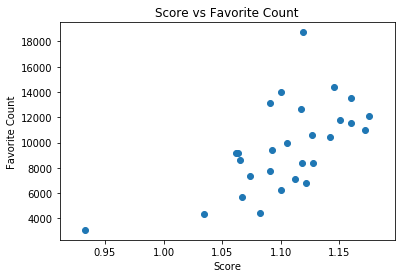

In [102]:
plt.scatter(types.score,types.favorite_count);
plt.xlabel('Score')
plt.ylabel('Favorite Count')
plt.title('Score vs Favorite Count');

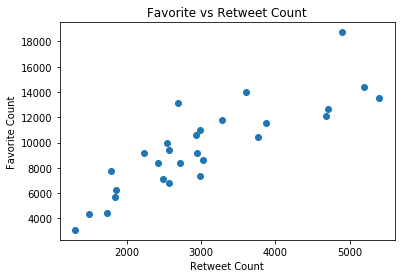

In [103]:
plt.scatter(types.retweet_count,types.favorite_count);
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.title('Favorite vs Retweet Count');

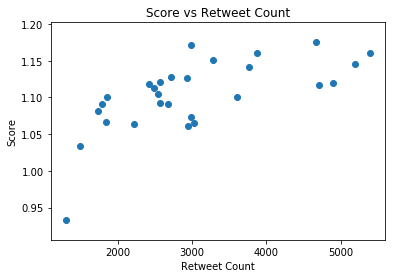

In [104]:
plt.scatter(types.retweet_count,types.score);
plt.xlabel('Retweet Count')
plt.ylabel('Score')
plt.title('Score vs Retweet Count');

As we can see in the charts above, all 3 features "favorite count", "retweet count" and "score" are more or less positively correlated to each other. Since "score" comes in the tweet's text and before the other 2 features, it is safe to assume that higher score in tweet's texts results in higher favorite and retweet count.